# Regressão Linear

*fonte: Wikipedia*

<img src="img/linear_regression.png" width="350" />

Em estatística ou econometria, regressão linear é uma equação para se estimar a condicional (valor esperado) de uma variável y, dados os valores de algumas outras variáveis x.
Exemplo de regressão linear.

A regressão, em geral, tem como objectivo tratar de um valor que não se consegue estimar inicialmente.

A regressão linear é chamada "linear" porque se considera que a relação da resposta às variáveis é uma função linear de alguns parâmetros. Os modelos de regressão que não são uma função linear dos parâmetros se chamam modelos de regressão não-linear. Sendo uma das primeiras formas de análise regressiva a ser estudada rigorosamente, e usada extensamente em aplicações práticas. Isso acontece porque modelos que dependem de forma linear dos seus parâmetros desconhecidos, são mais fáceis de ajustar que os modelos não-lineares aos seus parâmetros, e porque as propriedades estatísticas dos estimadores resultantes são fáceis de determinar.

Modelos de regressão linear são frequentemente ajustados usando a abordagem dos mínimos quadrados, mas que também pode ser montada de outras maneiras, tal como minimizando a "falta de ajuste" em alguma outra norma (com menos desvios absolutos de regressão), ou através da minimização de uma penalização da versão dos mínimos quadrados. Por outro lado, a abordagem de mínimos quadrados pode ser utilizado para ajustar a modelos que não são modelos lineares. Assim, embora os termos "mínimos quadrados" e "modelo linear" estejam intimamente ligados, eles não são sinônimos.

# Análise de dados e introdução a Regressão


## Forma do modelo linear

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$
- $y$ é a variável dependente (a resposta)
- $\beta_0$ é o termo de intercepção
- $\beta_1$ é o coeficiente para $x_1$ 
- $\beta_n$ é o coeficiente para $x_n$

Os **$\beta$** são os chamados **_Coeficientes do modelo_**

- Esses valores são estimados (ou "aprendidos") no processo de adaptação do modelo utilizando o critério **mínimos quadrados**.
- Especificamente, encontramos a linha (matematicamente) que minimiza a adição **de quadrados de resíduos** (ou “total de erros quadráticos”).
- E quando já tivermos aprendido esses coeficientes, podemos usar o modelo para prever a resposta.

## Operação vetorial (multidimensioanal)

Ao usar a base de dados com $k$ variáveis explicativas e $n$ observações, o modelo pode ser escrito na forma matricial:

<img src="img/regressao_matriz.png" width="450" />


## Pré-requisitos do modelo de regressão Linear

A maioria dos testes estatísticos depende de suposições sobre as variáveis. Para tirar conclusões sobre as estimativas para um modelo de regressão linear, quatro suposições são feitas sobre o comportamento dos dados:

- A relação entre as variáveis de resposta e de previsão é **linear** na natureza.
- Os erros são **independentes**. 
- Os erros possuem distribuições **normal**. 
- Os erros têm a **mesma** variância.


**LINEAR**
- Se a relação entre as variáveis ​​de resposta e preditor não for linear, os resultados da análise de regressão irão subestimar a verdadeira relação. Isso é melhor verificado com um gráfico de dispersão dos valores previstos versus os valores observados.


**INDEPENDENTES**
- Séries autocorrelacionadas o que não é o nosso caso. Plotar um histograma dos resíduos pode ajudar a verificar se eles são aleatórios. Se aleatório, os dados não devem exibir nenhuma estrutura identificável. Além disso, é comum testarmos a correlação dos residuos com as variaveis independentes.


**NORMAL**
- Se a distribuição de erro for significativamente não normal, os intervalos de previsão não serão confiáveis. O melhor teste para erros normalmente distribuídos é um gráfico de probabilidade normal dos resíduos . Se a distribuição for normal, os pontos em tal plotagem devem se aproximar da linha de referência diagonal.


- As violações da normalidade freqüentemente surgem porque as distribuições das variáveis ​​são significativamente não-normais e / ou a suposição de linearidade é violada. Em tais casos, uma transformação não linear de variáveis pode resolver ambos os problemas. Se as distribuições de algumas das variáveis ​​forem extremamente assimétricas ou de cauda longa, elas podem não se encaixar em um modelo linear com erros normalmente distribuídos.


- Como os dados reais raramente apresentam erros que normalmente são distribuídos normalmente e, como uma violação significativa da suposição de distribuição normal pode indicar outro problema com as premissas do modelo e / ou a presença de pontos de dados influentes, geralmente é útil se concentrar mais em quaisquer violações de dados. as outras suposições e / ou a influência de alguns outliers (que podem ser os principais responsáveis ​​por violações da normalidade de qualquer maneira).


**VARIÂNCIA**
- Se a variação dos erros for marcadamente diferente em vários valores, isso pode levar à distorção dos resultados e enfraquecer a análise. Essa suposição pode ser verificada examinando-se um gráfico residual dos valores previstos versus os resíduos padronizados . Idealmente, os resíduos são aleatoriamente espalhados em torno de 0, fornecendo uma distribuição relativamente uniforme. A largura vertical da dispersão não deve aparecer para aumentar ou diminuir os valores ajustados.


**Regressões Simples**

- O objetivo é ajustar a inclinação (w1 nesse exemplo) e o intercepto (b) de modo que a regressão linear (a "linha" laranja) minimize a soma dos resíduos (as distâncias entre as observações, "bolas azuis" e os valores esperados pela regressão, os resíduos são as distâncias verticais.)

<img src="img/linear_regression_scheme.png" width="450" />


#### Gerando dados para treinarmos.

- RNG é o método de números aleatórios que estamos criando com um seed fixo (123) para tornar-se reprodutivel, para que os mesmos números aleatórios sejam gerados - para documentação [clique aqui](https://www.mathworks.com/help/matlab/ref/rng.html);
- Como vamos gerar duas variáveis, vamos definir duas médias, 100 e 1000;
- Na variável cov está o "truque" para gerar dados fakes para uma regressão linear, estamos definindo uma matriz 2x2 (2 linhas e 2 colunas) e dizendo que a covariância entre as duas séries de números aleatórios que estamos criando **não** são independentes e essa não independencia é o que vamos tentar capturar com a regressão linear.
- Na variável sample estamos criando duas distribuições normal que seguem certa regra de covariância que passamos, por isso a ideia de elas são "multivariadas" (ou seja, os valores de uma série dependem da outra).


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_formats=['svg']

Começaremos com a regressão linear mais familiar, um ajuste linear aos dados. Um ajuste em linha reta é um modelo da forma de:
$$y = a * x + b $$

Onde $b$ é chamado de intercepto e $a$ de inclinação.

Considere os seguintes dados, que estão espalhados sobre uma linha com uma inclinação de 4 e um intercepto de -5:

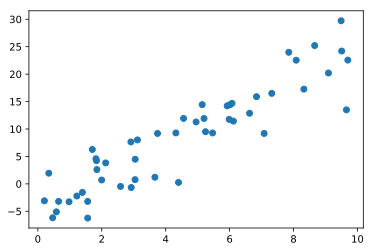

In [2]:
rng = np.random.RandomState(42)

x = 10 * rng.rand(50)

y = 3 * x  -5 + 4*rng.randn(50)

plt.scatter(x, y)

#### Solução analitica
 $w = (X^T X)^{-1} X^T y$
 
Para solução da derivação [clique aqui](https://stats.stackexchange.com/questions/46151/how-to-derive-the-least-square-estimator-for-multiple-linear-regression) 
<br>


Onde:
- w é o **vetor** de pesos (nossos parâmetros estimados)
- X é a matriz de valores, onde cada linha é uma observação e cada coluna é uma variável
- o Sobrescrito T indica "Transposto", ou seja, a matriz com um T é a matriz transposta.
- y é simplesmente o vetor da variável y.

#### Calculando o intercepto $b$ e a inclinação $a$ pela Solução Analítica (método raiz).

In [27]:
X = x[:, np.newaxis]

# Um ponto importante aqui é adicionar uma coluna de "1s" que será nosso intercepto.
Xb = np.hstack((np.ones((X.shape[0], 1)), X))
w = np.zeros(X.shape[1])

z = np.linalg.inv(np.dot(Xb.T, Xb))
w = np.dot(z, np.dot(Xb.T, y))
b, w1 = w[0], w[1]

print('Intercepto: %.2f' % b)
print('Inclinação: %.2f' % w1)

Intercepto: -4.61
Inclinação: 2.91


#### Agora utilizando o Sklearn.Linar_Model

Intercepto beta_0:  -4.613242902124453
Inclinação beta_1:  2.9106264015412417


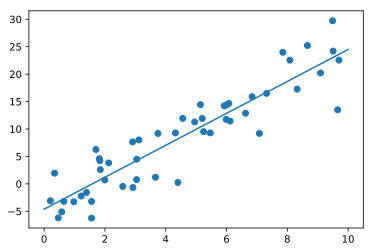

In [28]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 100)
yhat = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yhat)

print("Intercepto beta_0: ", model.intercept_)
print("Inclinação beta_1: ", model.coef_[0])

### MSE

Na estatística, o erro quadrático médio (MSE) ou o desvio médio quadrático (MSD) de um estimador (de um procedimento para estimar uma quantidade não observada) mede a média dos quadrados dos erros - isto é, a diferença quadrática média entre os estimados valores e o que é estimado. MSE é uma função de risco, correspondente ao valor esperado da perda de erro quadrada. O fato de que o MSE é quase sempre estritamente positivo (e não zero) é por causa da aleatoriedade ou porque o estimador não leva em conta informações que poderiam produzir uma estimativa mais precisa.

O MSE é uma medida da qualidade de um estimador - é sempre não negativo, e valores próximos de zero são melhores.

O MSE é o segundo momento (sobre a origem) do erro e, portanto, incorpora tanto a variância do estimador (quão amplamente difundidas as estimativas são de uma amostra de dados para outra) quanto seu viés (a que distância o valor médio estimado é da verdade). Para um estimador não-viesado, o MSE é a variância do estimador. Como a variância, o MSE tem as mesmas unidades de medida do quadrado da quantidade estimada. Em uma analogia ao desvio padrão, obter a raiz quadrada do MSE produz o erro quadrático médio ou o desvio quadrático médio (RMSE ou RMSD), que tem as mesmas unidades que a quantidade estimada; para um estimador não-viesado, o RMSE é a raiz quadrada da variância, conhecida como o erro padrão.


#### Qualidade do Ajuste

#### Erros Quadraticos Médios 
(MSE, Mean Squared Error)

$$MSE = \frac{1}{n} \sum_{i=1}^{n} \big(y_i - \hat{y_i}\big)^2$$

- Note que o MSE é dependente da escala, e retorna $unidade^2$

### RMSE

O RMSE (Root Mean Squared Error) representa simplesmente o MSE extraindo-se a raiz quadrada, para que o resultado fique na mesma unidade da variável estudada.


In [29]:
# Calculando os valores preditos pelo método raiz e calculando os Erros Quadráticos Médios

yhat = x*w1 + b
mse = np.mean((y - yhat)**2)
mse

13.169138299979002

In [30]:
# Extraindo a raiz quadrada para obter a resposta na mesma unidade de medida

# R = Root, Raiz
rmse = np.sqrt(mse)
rmse

3.6289307378316003

In [31]:
# Plotando a distribuição dos dados pelo respectivo erro em um gráfico de dispersão

plt.scatter(np.arange(x.shape[0]), y - y_predicted)
plt.ylabel('vertical offset')
plt.xlabel('index')

ValueError: operands could not be broadcast together with shapes (50,) (200,) 

In [32]:
import pandas as pd

In [37]:
df = pd.DataFrame({'y_natureza':y,
              'y_chapeu': yhat})

In [38]:
df['erro'] = df['y_natureza'] - df['y_chapeu']

In [40]:
df['erro2'] = df['erro']*df['erro']

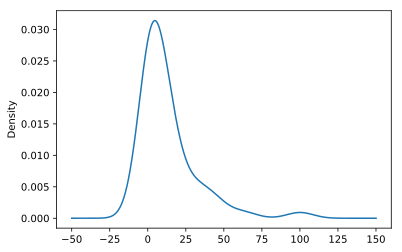

In [41]:
df['erro2'].plot.kde()

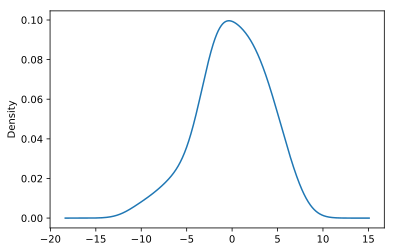

In [39]:
df['erro'].plot.kde()

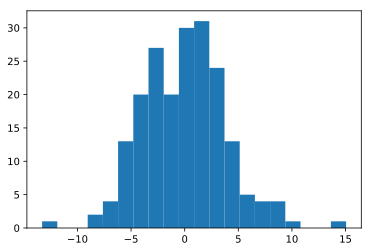

In [14]:
# Plotando a distribuição dos erros em um histograma

plt.hist(y - y_predicted, bins=20, )

plt.show()

## Coeficiente de Determinação 
ou $R^2$

- Soma total dos quadrados (variabilidade da variável resposta ou alvo, proporcional à variância do y):

$$SS_{total} = \sum_{i=1}^{n} \big( y_i - \bar{y_i} \big)^2$$

- Soma dos Residuos ao Quadrado:

$$SS_{residual} = \sum_{i=1}^{n} \big( \hat{y_i} - \bar{y_i} \big)^2$$

- Coeficiente de Determinação $R^2$:

$$R^2 = 1-\frac{SS_{residual}}{SS_{total}}$$

## Mais informações sobre o R Quadrado

R2 representa a porcentagem de variação na resposta que é explicada pelo modelo. Ele é calculado como 1 menos a razão da soma dos quadrados dos erros (que é a variação que não é explicada pelo modelo) para a soma total dos quadrados (que é a variação total no modelo).

#### Interpretação

Use R2 para determinar se o modelo ajusta bem os dados. Quanto mais alto o valor de R2 melhor o modelo ajusta seus dados. O valor de R2 está sempre entre 0 e 100%.

Você pode usar um gráfico de linha ajustada para ilustrar graficamente valores de R2 diferentes. O primeiro gráfico ilustra um modelo de regressão simples que explica 85,5% da variação na resposta. O segundo gráfico ilustra um modelo que explica 22,6% da variação na resposta. Quanto mais variação é explicada pelo modelo, mais perto os pontos de dados caem da linha de regressão ajustada. Teoricamente, se um modelo pudesse explicar 100% da variação, os valores ajustados sempre se igualariam aos valores observados e todos os pontos de dados cairiam sobre a linha ajustada. No entanto, mesmo se R2 representar 100%, o modelo não necessariamente prediz bem as novas observações. 

<br>
<img src="img/r2_exemplo.png" width="550" />
<br>

Considere as seguintes questões ao interpretar o valor de R2:

- O R2 sempre aumenta quando você adiciona mais preditores a um modelo. Por exemplo, o melhor modelo de cinco preditores terá sempre um R2 que é pelo menos tão elevado quanto o melhor modelo de quatro preditores. Portanto, R2 é mais útil quando for comparado a modelos do mesmo tamanho.

- Amostras pequenas não fornecem uma estimativa precisa da força da relação entre a resposta e os preditores. Se você precisar que R2 seja mais exato, deve usar uma amostra maior (geralmente, 40 ou mais).

- R2 é apenas uma medida de o quão bem o modelo ajusta os dados. Mesmo quando um modelo tem um R2 elevado, você deve verificar os gráficos de resíduos para conferir se o modelo satisfaz os pressupostos do modelo.

# R Quadrado Ajustado

O R2 ajustado é a porcentagem de variação na resposta que é explicada pelo modelo, ajustada para o número de preditores do modelo em relação ao número de observações. O R2 ajustado é calculado como 1 menos a razão entre o quadrado médio do erro (QME) em relação ao quadrado médio total (QM total).
Interpretação

Use o R2 ajustado quando desejar comparar modelos que têm diferentes números de preditores. R2 sempre aumenta quando você adiciona um preditor ao modelo, mesmo quando não existe uma verdadeira melhoria ao modelo. O valor de R2 ajustado incorpora o número de preditores no modelo para ajudá-lo a escolher o modelo correto.
Por exemplo, você trabalha para um fabricante de batatas fritas que examina os fatores que afetam a porcentagem de batatas quebradas por embalagem. Você recebe os seguintes resultados ao adicionar os preditores em uma abordagem stepwise. 

<br>
<img src="img/r2_ajustado.png" width="650" />
<br>

O primeiro modelo produz um R2 de mais de 50%. O segundo modelo adiciona a taxa de resfriamento ao modelo. O R2 ajustado aumenta, o que indica que a taxa de resfriamento melhora o modelo. O terceiro modelo, o que aumenta a temperatura de cozimento, aumenta o R2, mas não o R2 ajustado. Esses resultados indicam que a temperatura de cozimento não aprimoram o modelo. Com base nesses resultados, você considera remover a temperatura de cozimento do modelo. 

### Calculando o R Quadrado na prática

In [42]:
# Método raiz
mean_y = np.mean(y)
SS_total = np.sum((y - mean_y)**2)
SS_residual = np.sum((y_predicted - mean_y)**2)
r_squared = SS_residual / SS_total
r_squared

3.7978728378094995

In [43]:
# método nutella
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
r_value**2

0.840286642769916

## Analisando a relação entre Salário e Educação

<br>
<img src="img/ibge_sidra.png" width="350" />
<br>

Vamos testar uma hipótese. Será que estudar aumenta nossos salarios?

Vamos usar uma regressão de Salario ~ Estudo para nos ajudar a responder.

In [45]:
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2
import numpy as np
from sqlalchemy import create_engine
import io

In [46]:
credenciais = "host='dh-ds-t1-2019.cpvwsnqnnd2w.us-east-1.rds.amazonaws.com' port=5432  dbname='DHds2019' user=digitalhouse password=alunosDH19"

In [48]:
credenciais

"host='dh-ds-t1-2019.cpvwsnqnnd2w.us-east-1.rds.amazonaws.com' port=5432  dbname='DHds2019' user=digitalhouse password=alunosDH19"

In [49]:
conn = psycopg2.connect(credenciais)

In [51]:
query = '''
select *
from data
'''

df = sqlio.read_sql_query(query, conn)

df

,index,seq,id,idade,sexo,anos_estudo,cor/raca,salario,estado_civil,regiao,coluna_nova
0,0,0,1.100190e+10,53,homem,5.0,Parda,63600.000000,1.0,norte,None
1,1,1,1.100190e+10,49,mulher,8.0,Amarela,NaN,1.0,norte,None
2,2,2,1.100190e+10,22,mulher,11.0,Indigena,4352.400391,0.0,nordeste,None
3,3,3,1.100190e+10,55,homem,15.0,Amarela,96600.000000,1.0,norte,None
4,4,4,1.100190e+10,56,mulher,15.0,Amarela,157800.000000,1.0,norte,None
5,5,5,1.100190e+10,30,mulher,15.0,Amarela,88550.000000,0.0,nordeste,None
6,6,6,1.100190e+10,52,mulher,5.0,Branca,6734.400391,0.0,norte,None
7,7,7,1.100190e+10,29,homem,5.0,Parda,14875.200684,0.0,norte,None
8,8,8,1.100190e+10,29,mulher,11.0,Parda,6734.400391,0.0,norte,None
9,9,9,1.100191e+10,46,mulher,15.0,Branca,54300.000000,1.0,norte,None


In [52]:
df.corr()

,index,seq,id,idade,anos_estudo,salario,estado_civil
index,1.000000,1.000000,0.970360,0.044996,0.017342,0.018171,0.035717
seq,1.000000,1.000000,0.970360,0.044996,0.017342,0.018171,0.035717
id,0.970360,0.970360,1.000000,0.051951,0.035653,0.022322,0.029462
idade,0.044996,0.044996,0.051951,1.000000,-0.223166,0.122228,0.209986
anos_estudo,0.017342,0.017342,0.035653,-0.223166,1.000000,0.101445,-0.118830
salario,0.018171,0.018171,0.022322,0.122228,0.101445,1.000000,0.031017
estado_civil,0.035717,0.035717,0.029462,0.209986,-0.118830,0.031017,1.000000


In [53]:
# import pandas as pd
# df = pd.read_csv(r'../../99 Datasets/demografia.csv')
# df.head()

### Primeiro vamos ver o Scatter plot e tentar inferir alguma relação

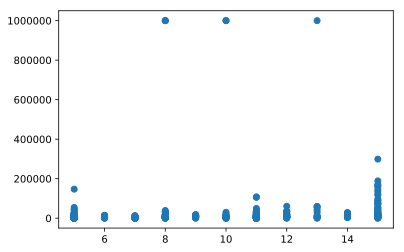

In [57]:
sample = df.sample(1000, random_state=7)
plt.scatter(sample['anos_estudo'], sample['salario'])

Dificil inferir algo desse grafico, mas já vemos que tem alguns outliners que não fazem muito sentido, vamos filtra-los.

In [62]:
del df['coluna_nova']

In [65]:
# df2 = df.copy(deep=True)

In [63]:
# df.drop(['coluna_nova'], axis=1, inplace=True)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66470 entries, 0 to 66469
Data columns (total 10 columns):
index           66470 non-null int64
seq             66470 non-null int64
id              66470 non-null float64
idade           66470 non-null int64
sexo            66470 non-null object
anos_estudo     66036 non-null float64
cor/raca        66228 non-null object
salario         47878 non-null float64
estado_civil    66470 non-null float64
regiao          66470 non-null object
dtypes: float64(4), int64(3), object(3)
memory usage: 5.1+ MB


In [69]:

mascara_salario = df.salario<500000

df['coluna'] = mascara_salario

df.head()

,index,seq,id,idade,sexo,anos_estudo,cor/raca,salario,estado_civil,regiao,coluna
0,0,0,1.100190e+10,53,homem,5.0,Parda,63600.000000,1.0,norte,True
1,1,1,1.100190e+10,49,mulher,8.0,Amarela,NaN,1.0,norte,False
2,2,2,1.100190e+10,22,mulher,11.0,Indigena,4352.400391,0.0,nordeste,True
3,3,3,1.100190e+10,55,homem,15.0,Amarela,96600.000000,1.0,norte,True
4,4,4,1.100190e+10,56,mulher,15.0,Amarela,157800.000000,1.0,norte,True


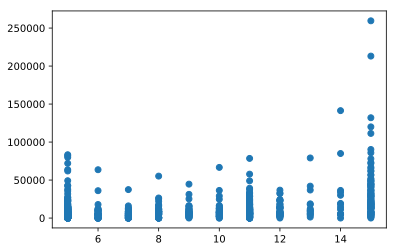

In [70]:
sample = df[mascara_salario].dropna().sample(1000, random_state=7)

plt.scatter(sample['anos_estudo'], sample['salario'])

Analisando a correlação

In [72]:
sample[['anos_estudo','salario']].corr()

,anos_estudo,salario
anos_estudo,1.00000,0.32395
salario,0.32395,1.00000


Legal! Correlação de 0.3 responde nossa pergunta. Quanto mais estudo mais salario, além disso a taxa é de 30% de "transferência" entre estudo e salario. Está certo isso? Quais os problemas?

Vamos rodar uma regressão para ver as diferenças ..

In [73]:
model = LinearRegression(fit_intercept=True)

model.fit(sample['anos_estudo'][:, np.newaxis], sample['salario'])

xfit = np.linspace(0, 14, 100)
yhat = model.predict(xfit[:, np.newaxis])

print("Intercepto beta_0: ", model.intercept_)
print("Inclinação beta_1: ", model.coef_[0])

Intercepto beta_0:  -3296.2637767190317
Inclinação beta_1:  1707.8013864648765


In [74]:
model = LinearRegression(fit_intercept=True)

model.fit(sample['anos_estudo'][:, np.newaxis], sample['salario'])

xfit = np.linspace(0, 14, 1000)
yhat = model.predict(xfit[:, np.newaxis])

print("Intercepto beta_0: ", model.intercept_)
print("Inclinação beta_1: ", model.coef_[0])

Intercepto beta_0:  -3296.2637767190317
Inclinação beta_1:  1707.8013864648765


In [76]:
print("R^2: ", model.score(sample['anos_estudo'][:, np.newaxis], sample['salario']))

R^2:  0.10494385916738314


Utilizando o método Scipy.Stats.Linregress

In [77]:
# método nutella
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(sample['anos_estudo'], sample['salario'])

In [82]:
print ('Inclinação:', slope)
print ('Intercepto:', intercept)
print ('R-quadrado:', r_value**2)

Inclinação: 1707.8013864648785
Intercepto: -3296.263776719048
R-quadrado: 0.10494385916738333


#### plotar o gráfico de distribuição dos erros

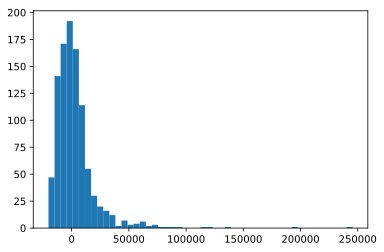

In [83]:
y = sample['salario']
plt.hist(y - yhat,bins=50)

plt.show()

### plotar o gráfico de dispersão dos erros

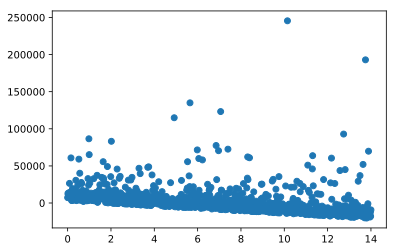

In [84]:
plt.scatter(xfit, y-yhat)

## Estudar a relação entre idade e salário

In [85]:
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings("ignore")

In [88]:
list(df)

['index',
 'seq',
 'id',
 'idade',
 'sexo',
 'anos_estudo',
 'cor/raca',
 'salario',
 'estado_civil',
 'regiao',
 'coluna']

In [ ]:
df['salario']

In [109]:
function = '''salario ~ anos_estudo + np.exp(anos_estudo) + np.sqrt(anos_estudo)'''

%time model = smf.ols(function, df[df.salario<500000]).fit()

Wall time: 27.9 ms


In [108]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
=================================================================================
Model:                  OLS                  Adj. R-squared:         0.159       
Dependent Variable:     salario              AIC:                    1058692.4832
Date:                   2019-04-10 22:31     BIC:                    1058727.5288
No. Observations:       47165                Log-Likelihood:         -5.2934e+05 
Df Model:               3                    F-statistic:            2969.       
Df Residuals:           47161                Prob (F-statistic):     0.00        
R-squared:              0.159                Scale:                  3.2803e+08  
---------------------------------------------------------------------------------
                        Coef.     Std.Err.    t    P>|t|     [0.025      0.975]  
---------------------------------------------------------------------------------
Intercept             39930.5385 5129.0525  7.7852 0.0000  29877.5223  49983.5548
anos_estudo            5241.2495  675.2191  7.7623 0.0000   3917.8105   6564.6885
np.exp(anos_estudo)       0.0053    0.0002 23.2666 0.0000      0.0048      0.0057
np.sqrt(anos_estudo) -26119.4560 3775.3049 -6.9185 0.0000 -33519.1076 -18719.8045
---------------------------------------------------------------------------------
Omnibus:                 58616.733         Durbin-Watson:            1.784       
Prob(Omnibus):           0.000             Jarque-Bera (JB):         13361017.926
Skew:                    6.669             Prob(JB):                 0.000       
Kurtosis:                84.369            Condition No.:            79793661    
=================================================================================
* The condition number is large (8e+07). This might indicate             strong
multicollinearity or other numerical problems.
"""